In [25]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


# .env Ë™≠„ÅøËæº„Åø
print(r"..\environment\.env")
load_dotenv(dotenv_path=r'..\environment/.env',override=True)

# =========================
# üîê Metabase Ë™çË®º„Éª„Éá„Éº„ÇøÂèñÂæó
# =========================

login_url = "https://metabase.tr-com.net/api/session"
username = os.getenv("MB_USERNAME", "").strip()
password = os.getenv("MB_PASSWORD", "").strip()

if not username or not password:
    raise ValueError("‚ùå MB_USERNAME „Åæ„Åü„ÅØ MB_PASSWORD „ÅåË®≠ÂÆö„Åï„Çå„Å¶„ÅÑ„Åæ„Åõ„Çì")

print(f"„É≠„Ç∞„Ç§„É≥Ë©¶Ë°å‰∏≠ ‚Üí username: '{username}'")

response = requests.post(login_url, json={"username": username, "password": password})
if response.status_code == 200:
    session_id = response.json().get("id")
    print("‚úÖ „É≠„Ç∞„Ç§„É≥ÊàêÂäü")
else:
    raise Exception(f"‚ùå „É≠„Ç∞„Ç§„É≥Â§±Êïó: {response.status_code}, {response.text}")


..\environment\.env
„É≠„Ç∞„Ç§„É≥Ë©¶Ë°å‰∏≠ ‚Üí username: 'y-nitta@torishima.co.jp'
‚úÖ „É≠„Ç∞„Ç§„É≥ÊàêÂäü


In [26]:

# „Éá„Éº„ÇøÂèñÂæó
url = "https://metabase.tr-com.net/api/card/2070/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [27]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfori = pd.DataFrame(data)
        if dfori.empty:
            raise ValueError("‚ùå ÂèñÂæó„Åó„Åü„Éá„Éº„Çø„ÅåÁ©∫„Åß„Åô„ÄÇMetabase„ÇíÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ")
        print("‚úÖ „Éá„Éº„ÇøÂèñÂæóÊàêÂäü")
        print(dfori.head())

    except Exception as e:
        raise Exception(f"‚ùå „Éá„Éº„ÇøÂèñÂæó„ÉªDataFrameÂ§âÊèõÂ§±Êïó: {e}")
else:
    raise Exception(f"‚ùå „Éá„Éº„ÇøÂèñÂæóÂ§±Êïó: {response.status_code}, {response.text}")


‚úÖ „Éá„Éº„ÇøÂèñÂæóÊàêÂäü
   SensorId                               AssetId SensorType Orientation
0  EC10017B  e7877c64-7407-4375-ad20-206b5d0f89c2          M           2
1  EC1001B2  04fa37c4-89f8-4e46-a2dc-37c6b0c53c76          M           2
2  EC1003CA  867c50e0-9b92-43e1-ab1c-bc784040ea28          M           2
3  EC1003CE  d672d87c-055f-4c06-85fa-b2a502d6d8f5          M           2
4  EC1003E0  a8eae6a7-ecdb-4959-9d8b-50db3619e680          M           2


In [28]:

# „Éá„Éº„ÇøÂèñÂæó
url = "https://metabase.tr-com.net/api/card/2071/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [29]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfpump = pd.DataFrame(data)
        if dfpump.empty:
            raise ValueError("‚ùå ÂèñÂæó„Åó„Åü„Éá„Éº„Çø„ÅåÁ©∫„Åß„Åô„ÄÇMetabase„ÇíÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ")
        print("‚úÖ „Éá„Éº„ÇøÂèñÂæóÊàêÂäü")
        print(dfpump.head())

    except Exception as e:
        raise Exception(f"‚ùå „Éá„Éº„ÇøÂèñÂæó„ÉªDataFrameÂ§âÊèõÂ§±Êïó: {e}")
else:
    raise Exception(f"‚ùå „Éá„Éº„ÇøÂèñÂæóÂ§±Êïó: {response.status_code}, {response.text}")


‚úÖ „Éá„Éº„ÇøÂèñÂæóÊàêÂäü
                                AssetId      Model  ModelCode
0  000c617f-2bdf-4e56-87b1-659f90586ad0  CAL32-125          7
1  00b9e08c-72af-4edc-8471-464e30fdb7d3        CDM          5
2  00bbdac6-ab6a-446f-9541-ee9bb2ffb28d  MMTV200/5          2
3  00c79c40-1525-44cb-bc22-ba387c0f46c5    MMO65/7          8
4  00d079ed-e148-4553-a200-30a981b4d3c2    MMO65/7          8


In [30]:
dfori

SensorId                               AssetId  \
0                       EC10017B  e7877c64-7407-4375-ad20-206b5d0f89c2   
1                       EC1001B2  04fa37c4-89f8-4e46-a2dc-37c6b0c53c76   
2                       EC1003CA  867c50e0-9b92-43e1-ab1c-bc784040ea28   
3                       EC1003CE  d672d87c-055f-4c06-85fa-b2a502d6d8f5   
4                       EC1003E0  a8eae6a7-ecdb-4959-9d8b-50db3619e680   
...                          ...                                   ...   
2743  XVXP1VB2BEAA71343EA01D6D5F  1acb71e4-2707-44b2-9c76-8ae9cc694fab   
2744  XVXP1VB3AA6C81348D11528858  c2e45286-866a-4512-b8cf-fd8c6355d85c   
2745  XVXP1VB3C0DC613465B457BA21  ec87341b-4bf4-4da2-b918-fd0e49f452d8   
2746  XVXP1VB9E6D4B13465B4233240  fb087902-62aa-411a-ae6d-6fb9cd852edc   
2747  XVXP2VB2BEAA71343EA01D8E45  1acb71e4-2707-44b2-9c76-8ae9cc694fab   

     SensorType Orientation  
0             M           2  
1             M           2  
2             M           2  
3             M           2  
4             M           2  
...         ...         ...  
2743          M           2  
2744          M           2  
2745          M           2  
2746          M           2  
2747          M           2  

[2748 rows x 4 columns]

In [31]:

dfori = dfori.drop_duplicates(subset='AssetId', keep='first')
dfori 


SensorId                               AssetId  \
0                    EC10017B  e7877c64-7407-4375-ad20-206b5d0f89c2   
1                    EC1001B2  04fa37c4-89f8-4e46-a2dc-37c6b0c53c76   
2                    EC1003CA  867c50e0-9b92-43e1-ab1c-bc784040ea28   
3                    EC1003CE  d672d87c-055f-4c06-85fa-b2a502d6d8f5   
4                    EC1003E0  a8eae6a7-ecdb-4959-9d8b-50db3619e680   
...                       ...                                   ...   
2717   XVVC003261134B298CC805  796c2cb8-f1a7-4ef5-9303-e4eec21336ce   
2718  XVVC00327A134B2985A1833  f191d481-37d7-4a90-adce-6c3e5a43c9a2   
2739   XVVC00433B134D88BE4553  14e9a7cf-61c1-46bd-bf34-258f0c7327e5   
2740  XVVC00434D134D95231AA80  6561f9d9-0ec5-407e-8e3d-3c3c560be47a   
2741   XVVC0043A1134DA164C806  b3584c7d-05d9-457d-ac9f-5cd0bc317947   

     SensorType Orientation  
0             M           2  
1             M           2  
2             M           2  
3             M           2  
4             M           2  
...         ...         ...  
2717          M           1  
2718          M           1  
2739          M           2  
2740          M           2  
2741          M           1  

[1723 rows x 4 columns]

In [32]:
dfori[dfori['AssetId'].duplicated(keep=False)]

Empty DataFrame
Columns: [SensorId, AssetId, SensorType, Orientation]
Index: []

In [33]:
dfpump

AssetId         Model  ModelCode
0     000c617f-2bdf-4e56-87b1-659f90586ad0     CAL32-125          7
1     00b9e08c-72af-4edc-8471-464e30fdb7d3           CDM          5
2     00bbdac6-ab6a-446f-9541-ee9bb2ffb28d     MMTV200/5          2
3     00c79c40-1525-44cb-bc22-ba387c0f46c5       MMO65/7          8
4     00d079ed-e148-4553-a200-30a981b4d3c2       MMO65/7          8
...                                    ...           ...        ...
1484  ff93115d-beb3-4606-a7c4-72d60ff85c99  CDM350X300HN          5
1485  ff97c942-8eb3-47ec-89a5-e333614e36e6     CAL32-125          7
1486  ffa63aa5-8536-45c9-a38f-45f6daba94da    CDM700x600          5
1487  ffecef2d-70a2-44b3-9089-c54455d4943d        MHG4/6          3
1488  fffd8640-235e-46c4-8490-ff91aa7eef49       MMO65/7          8

[1489 rows x 3 columns]

In [34]:
dfpump[dfpump['AssetId'].duplicated(keep=False)]

Empty DataFrame
Columns: [AssetId, Model, ModelCode]
Index: []

In [35]:

merged_df = pd.merge(dfpump, dfori, on='AssetId', how='inner')
print("„Éû„Éº„Ç∏Âæå‰ª∂Êï∞:", len(merged_df))


„Éû„Éº„Ç∏Âæå‰ª∂Êï∞: 213


In [36]:
merged_df

AssetId          Model  ModelCode  SensorId  \
0    00bbdac6-ab6a-446f-9541-ee9bb2ffb28d      MMTV200/5          2  VB39B0E8   
1    02a41c06-b19b-4a11-b505-3f9fd52e184a      MHD40/11E          1  VB9E7FA8   
2    02bab784-8b07-4391-83a7-22fd6dfe05c9  CDM600X500KBA          5  VB89B403   
3    030a1b28-d3dc-46a2-802b-30b8d87359e7       MHG5/11A          3  VC000F1E   
4    03b12cb6-df67-40a1-928e-91ae6149d84d     CAM150-400          7  VB35DCB6   
..                                    ...            ...        ...       ...   
208  fe84ff53-4a3c-4dbd-9348-b330d5e172ee        MML40/6          9  VB6C5EB4   
209  fe91b482-3e69-4177-b210-d909a2ffe185      CAR50-200          7  VBC353F0   
210  ff7a14f4-c0ce-4e0d-81f7-e3ddd0a0c90a         MHG2/9          3  VB3A4993   
211  ff8b6f63-1b9d-4db5-a08a-ef07c8110f0b     CAL200-250          7  VB8B4B10   
212  ffa63aa5-8536-45c9-a38f-45f6daba94da     CDM700x600          5  VB8BC173   

    SensorType Orientation  
0            M           2  
1            M           2  
2            M           2  
3            M           2  
4            M           2  
..         ...         ...  
208          M           2  
209          M           2  
210          M           2  
211          M           2  
212          M           2  

[213 rows x 6 columns]

In [37]:
merged_df[merged_df['SensorId'].duplicated(keep=False)]

Empty DataFrame
Columns: [AssetId, Model, ModelCode, SensorId, SensorType, Orientation]
Index: []

In [38]:
import requests
import pandas as pd

# SensorId ‰∏ÄË¶ß
sensor_ids = merged_df['SensorId'].dropna().tolist()

# Metabase API ÊÉÖÂ†±
url = "https://metabase.tr-com.net/api/card/2072/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id  
}

# „Éá„Éº„ÇøÊ†ºÁ¥ç
results = []

# API „É´„Éº„Éó
for sid in sensor_ids:
    payload = {
        "parameters": [
            {
                "type": "category",
                "target": ["variable", ["template-tag", "sensorid"]],
                "value": sid
            }
        ]
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
            df = pd.DataFrame(data)
            if not df.empty:
                df["sensorid"] = sid  # sensorid Âàó„Å®„Åó„Å¶ËøΩÂä†ÔºàÂ∞èÊñáÂ≠óÔºâ
                results.append(df)
                print(f"‚úÖ SensorId={sid}ÔºöÂèñÂæóÊàêÂäü")
            else:
                print(f"‚ö†Ô∏è SensorId={sid}Ôºö„Éá„Éº„Çø„Å™„Åó")
        except Exception as e:
            print(f"‚ùå SensorId={sid}ÔºöJSONÂ§âÊèõÂ§±Êïó - {e}")
    else:
        print(f"‚ùå SensorId={sid}Ôºö„É™„ÇØ„Ç®„Çπ„ÉàÂ§±Êïó - {response.status_code}, {response.text}")

# Áµ±Âêà„ÉªÊï¥ÂΩ¢
if results:
    dffft_all = pd.concat(results, ignore_index=True)

    # sensorid „Çí„Ç≠„Éº„Å´ merged_df „Åã„Çâ Model + ModelCode „ÇíËøΩÂä†
    df_model = merged_df[['SensorId', 'ModelCode', 'Model']].rename(columns={'SensorId': 'sensorid'})
    final_df = pd.merge(dffft_all, df_model, on='sensorid', how='left')

    # ÂøÖË¶Å„Å™Âàó„Å†„ÅëÊäΩÂá∫„Éª‰∏¶„Å≥Êõø„Åà
    final_df = final_df[['sensorid', 'ModelCode', 'Model', 'fftrecord_date', 'fftdatax']]


    # ÁµêÊûú„ÅÆÁ¢∫Ë™ç
    print("‚úÖ ÊúÄÁµÇ„Éá„Éº„Çø„Éï„É¨„Éº„É†‰ΩúÊàêÂÆå‰∫Ü")
    print(final_df.head())
else:
    raise ValueError("‚ùå ÊúâÂäπ„Å™„Éá„Éº„Çø„Åå1‰ª∂„ÇÇÂèñÂæó„Åß„Åç„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ")


‚úÖ SensorId=VB39B0E8ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB9E7FA8ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB89B403ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VC000F1EÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB35DCB6ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB68F135ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB3793A7ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB393DC5ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VC000F2DÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB2B314FÔºöÂèñÂæóÊàêÂäü
‚ö†Ô∏è SensorId=XVVB36C1BC134893D4E883Ôºö„Éá„Éº„Çø„Å™„Åó
‚úÖ SensorId=VB0FC749ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB686BD8ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB68B648ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VBA2ACA6ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VC000EC4ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB6C5E92ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB28C465ÔºöÂèñÂæóÊàêÂäü
‚ö†Ô∏è SensorId=XVVB3754841343F0152A056Ôºö„Éá„Éº„Çø„Å™„Åó
‚úÖ SensorId=VB681364ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB3B101DÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB26E44BÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB358750ÔºöÂèñÂæóÊàêÂäü
‚úÖ SensorId=VB37A672ÔºöÂèñÂæóÊàêÂäü
‚ö†Ô∏è SensorId=XVVBC0671B134D6F462960Ôºö„Éá„Éº„Çø„Å™„Åó
‚úÖ SensorId=V

In [39]:
# CSV„Å®„Åó„Å¶‰øùÂ≠òÔºàÊñáÂ≠óÂåñ„ÅëÈò≤Ê≠¢„Å´UTF-8 BOM‰ªò„ÅçÔºâ
final_df.to_csv("fft_model_data.csv", index=False, encoding='utf-8-sig')


In [40]:
print(final_df.shape)
print(final_df)


(28217, 5)
       sensorid  ModelCode       Model       fftrecord_date  \
0      VB39B0E8          2   MMTV200/5  2020-04-23T19:14:29   
1      VB39B0E8          2   MMTV200/5  2020-06-23T11:53:55   
2      VB39B0E8          2   MMTV200/5  2020-06-30T11:53:54   
3      VB39B0E8          2   MMTV200/5  2020-07-01T11:53:19   
4      VB39B0E8          2   MMTV200/5  2020-07-08T11:53:19   
...         ...        ...         ...                  ...   
28212  VB8BC173          5  CDM700x600  2022-05-09T05:46:12   
28213  VB8BC173          5  CDM700x600  2022-05-30T05:45:06   
28214  VB8BC173          5  CDM700x600  2022-06-06T05:43:47   
28215  VB8BC173          5  CDM700x600  2022-06-20T05:42:50   
28216  VB8BC173          5  CDM700x600  2022-07-04T05:42:08   

                                                fftdatax  
0      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
1      0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.02...  
2      0.03,0.01,0.01,0,0,0,0,0,0,0.01,0,0.01,0.02,0...

In [41]:
# ‰ª∂Êï∞„Çí„Ç´„Ç¶„É≥„Éà„Åó„Å¶Ë°®Á§∫ÔºàÈôçÈ†ÜÔºâ
print(final_df['ModelCode'].value_counts().sort_index())


ModelCode
1      695
2      484
3     1539
4      143
5     2631
7    20815
8      252
9     1658
Name: count, dtype: int64


In [42]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# === ÁâπÂæ¥Èáè‰øùÂ≠òÁî®„É™„Çπ„Éà ===
features = []

# === 1Ë°å„Åö„Å§Âá¶ÁêÜ„Åó„Å¶„É™„Çπ„Éà„Å´ËøΩÂä† ===
for i, row in final_df.iterrows():
    try:
        arr = np.array(list(map(float, row['fftdatax'].split(','))))
        power_spectrum = arr ** 2
        norm_ps = power_spectrum / (np.sum(power_spectrum) + 1e-8)
        N = len(arr)
        freqs = np.arange(N)

        basic = {
            'mean': np.mean(arr),
            'std': np.std(arr),
            'max': np.max(arr),
            'min': np.min(arr),
            'median': np.median(arr),
            'peak_ratio': np.max(arr) / (np.mean(arr) + 1e-8),
            'energy': np.sum(arr**2),
        }

        spectral = {
            'spectral_centroid': np.sum(freqs * power_spectrum) / (np.sum(power_spectrum) + 1e-8),
            'spectral_entropy': entropy(norm_ps),
            'spectral_flatness': np.exp(np.mean(np.log(arr + 1e-8))) / (np.mean(arr) + 1e-8),
            'low_freq_energy': np.sum(power_spectrum[:N//3]),
            'mid_freq_energy': np.sum(power_spectrum[N//3:2*N//3]),
            'high_freq_energy': np.sum(power_spectrum[2*N//3:])
        }

        feature_row = {
            'sensorid': row['sensorid'],
            'ModelCode': row['ModelCode'],
            'Model': row['Model'],
            'fftrecord_date': row['fftrecord_date'],
            **basic,
            **spectral
        }

        features.append(feature_row)

        if i % 500 == 0:
            print(f"{i} rows processed...")

    except Exception as e:
        print(f"Error processing row {i}: {e}")

# === ÊúÄÂæå„Å´ DataFrame „Å´„Åæ„Å®„ÇÅ„Å¶‰øùÂ≠ò ===
feature_df = pd.DataFrame(features)
feature_df.to_csv('fft_features_output.csv', index=False)
print("ÁâπÂæ¥ÈáèÊäΩÂá∫ÂÆå‰∫Ü: fft_features_output.csv „Å´‰øùÂ≠ò„Åó„Åæ„Åó„Åü„ÄÇ")


0 rows processed...
500 rows processed...
1000 rows processed...
1500 rows processed...
2000 rows processed...
2500 rows processed...
3000 rows processed...
3500 rows processed...
4000 rows processed...
4500 rows processed...
5000 rows processed...
5500 rows processed...
6000 rows processed...
6500 rows processed...
7000 rows processed...
7500 rows processed...
8000 rows processed...
8500 rows processed...
9000 rows processed...
9500 rows processed...
10000 rows processed...
10500 rows processed...
11000 rows processed...
11500 rows processed...
12000 rows processed...
12500 rows processed...
13000 rows processed...
13500 rows processed...
14000 rows processed...
14500 rows processed...
15000 rows processed...
15500 rows processed...
16000 rows processed...
16500 rows processed...
17000 rows processed...
17500 rows processed...
18000 rows processed...
18500 rows processed...
19000 rows processed...
19500 rows processed...
20000 rows processed...
20500 rows processed...
21000 rows proce

In [43]:
feature_df

sensorid  ModelCode       Model       fftrecord_date      mean  \
0      VB39B0E8          2   MMTV200/5  2020-04-23T19:14:29  0.000000   
1      VB39B0E8          2   MMTV200/5  2020-06-23T11:53:55  0.000149   
2      VB39B0E8          2   MMTV200/5  2020-06-30T11:53:54  0.005416   
3      VB39B0E8          2   MMTV200/5  2020-07-01T11:53:19  0.001409   
4      VB39B0E8          2   MMTV200/5  2020-07-08T11:53:19  0.004851   
...         ...        ...         ...                  ...       ...   
28212  VB8BC173          5  CDM700x600  2022-05-09T05:46:12  0.000030   
28213  VB8BC173          5  CDM700x600  2022-05-30T05:45:06  0.000013   
28214  VB8BC173          5  CDM700x600  2022-06-06T05:43:47  0.025078   
28215  VB8BC173          5  CDM700x600  2022-06-20T05:42:50  0.023929   
28216  VB8BC173          5  CDM700x600  2022-07-04T05:42:08  0.025461   

            std    max  min  median   peak_ratio    energy  spectral_centroid  \
0      0.000000   0.00  0.0    0.00     0.000000    0.0000           0.000000   
1      0.001345   0.03  0.0    0.00   201.328770    0.0183         672.502365   
2      0.012075   0.43  0.0    0.00    79.394240    1.7514        4919.621532   
3      0.003925   0.05  0.0    0.00    35.485909    0.1739        5143.167042   
4      0.011682   0.44  0.0    0.00    90.702761    1.5999        4909.170230   
...         ...    ...  ...     ...          ...       ...                ...   
28212  0.000599   0.02  0.0    0.00   666.444518    0.0036         283.082547   
28213  0.000387   0.02  0.0    0.00  1537.279016    0.0015          93.266045   
28214  0.167625  12.24  0.0    0.01   488.077005  287.2702        5135.094229   
28215  0.122194   7.93  0.0    0.01   331.396911  155.0399        4907.149425   
28216  0.168937  10.97  0.0    0.01   430.854864  291.8793        5062.621456   

       spectral_entropy  spectral_flatness  low_freq_energy  mid_freq_energy  \
0                   NaN           1.000000           0.0000           0.0000   
1              4.660049           0.000081           0.0183           0.0000   
2              6.148217           0.000255           0.4741           0.6135   
3              6.881549           0.000041           0.0448           0.0529   
4              5.746624           0.000215           0.3780           0.6433   
...                 ...                ...              ...              ...   
28212          3.121421           0.000346           0.0035           0.0000   
28213          2.338372           0.000782           0.0015           0.0000   
28214          2.010369           0.016841          12.3139         273.6823   
28215          2.382916           0.031050          15.1072         137.8215   
28216          2.035880           0.022497          16.9462         273.3121   

       high_freq_energy  
0                0.0000  
1                0.0000  
2                0.6638  
3                0.0762  
4                0.5786  
...                 ...  
28212            0.0001  
28213            0.0000  
28214            1.2740  
28215            2.1112  
28216            1.6210  

[28217 rows x 17 columns]

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# === ModelCode 1„Äú9 „ÇíÊäΩÂá∫ ===
mask_model_1_to_9 = final_df["ModelCode"].isin(range(1, 10))
features_subset = feature_df[mask_model_1_to_9]
modelcode_subset = final_df.loc[mask_model_1_to_9, "ModelCode"]

# === Êï∞ÂÄ§Âàó„ÅÆ„ÅøÊäΩÂá∫„Åó„ÄÅNaN„ÇíÈô§Â§ñ ===
numerical_features = features_subset.select_dtypes(include=["number"])
numerical_features_clean = numerical_features.dropna()
modelcode_clean = modelcode_subset[numerical_features_clean.index]

# === ÊïôÂ∏´„ÅÇ„ÇäÂ≠¶Áøí„Éá„Ç£„Éº„Éó„É©„Éº„Éã„É≥„Ç∞Ôºà„ÉÜ„É≥„ÇΩ„É´„Éï„É≠„ÉºÔºâ

# === „Éó„É≠„ÉÉ„Éà (3√ó3„Ç∞„É™„ÉÉ„Éâ) ===



In [45]:
numerical_features_clean 

ModelCode      mean       std    max  min  median   peak_ratio  \
1              2  0.000149  0.001345   0.03  0.0    0.00   201.328770   
2              2  0.005416  0.012075   0.43  0.0    0.00    79.394240   
3              2  0.001409  0.003925   0.05  0.0    0.00    35.485909   
4              2  0.004851  0.011682   0.44  0.0    0.00    90.702761   
7              1  0.001049  0.005478   0.08  0.0    0.00    76.262381   
...          ...       ...       ...    ...  ...     ...          ...   
28212          5  0.000030  0.000599   0.02  0.0    0.00   666.444518   
28213          5  0.000013  0.000387   0.02  0.0    0.00  1537.279016   
28214          5  0.025078  0.167625  12.24  0.0    0.01   488.077005   
28215          5  0.023929  0.122194   7.93  0.0    0.01   331.396911   
28216          5  0.025461  0.168937  10.97  0.0    0.01   430.854864   

         energy  spectral_centroid  spectral_entropy  spectral_flatness  \
1        0.0183         672.502365          4.660049           0.000081   
2        1.7514        4919.621532          6.148217           0.000255   
3        0.1739        5143.167042          6.881549           0.000041   
4        1.5999        4909.170230          5.746624           0.000215   
7        0.3111        2130.833104          5.451153           0.000021   
...         ...                ...               ...                ...   
28212    0.0036         283.082547          3.121421           0.000346   
28213    0.0015          93.266045          2.338372           0.000782   
28214  287.2702        5135.094229          2.010369           0.016841   
28215  155.0399        4907.149425          2.382916           0.031050   
28216  291.8793        5062.621456          2.035880           0.022497   

       low_freq_energy  mid_freq_energy  high_freq_energy  
1               0.0183           0.0000            0.0000  
2               0.4741           0.6135            0.6638  
3               0.0448           0.0529            0.0762  
4               0.3780           0.6433            0.5786  
7               0.3056           0.0055            0.0000  
...                ...              ...               ...  
28212           0.0035           0.0000            0.0001  
28213           0.0015           0.0000            0.0000  
28214          12.3139         273.6823            1.2740  
28215          15.1072         137.8215            2.1112  
28216          16.9462         273.3121            1.6210  

[26981 rows x 14 columns]

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# „Éá„Éº„ÇøÊ∫ñÂÇô
df = numerical_features_clean.copy()
X = df.drop("ModelCode", axis=1)
y = df["ModelCode"] - 1  # 0„Äú8„Å´Â§âÊèõ

# Ê®ôÊ∫ñÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Â≠¶ÁøíÁî®„ÉªÊ§úË®ºÁî®„Å´ÂàÜÂâ≤
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# „É¢„Éá„É´ÊßãÁØâ
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9„ÇØ„É©„Çπ
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Â≠¶Áøí
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=16)


Epoch 1/30


c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1349/1349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.7214 - loss: 0.9482 - val_accuracy: 0.8255 - val_loss: 0.5715
Epoch 2/30
1349/1349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8239 - loss: 0.5743 - val_accuracy: 0.8447 - val_loss: 0.5067
Epoch 3/30
1349/1349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8371 - loss: 0.5216 - val_accuracy: 0.8564 - val_loss: 0.4807
Epoch 4/30
1349/1349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8465 - loss: 0.4972 - val_accuracy: 0.8649 - val_loss: 0.4586
Epoch 5/30
1349/1349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8672 - loss: 0.4525 - val_accuracy: 0.8738 - val_loss: 0.4336
Epoch 6/30
1349/1349 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.8668 - loss: 0.4458 - val_accuracy: 0.8733 - val_loss

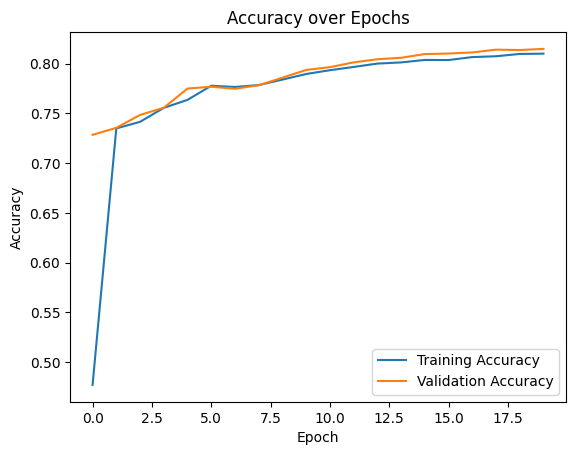

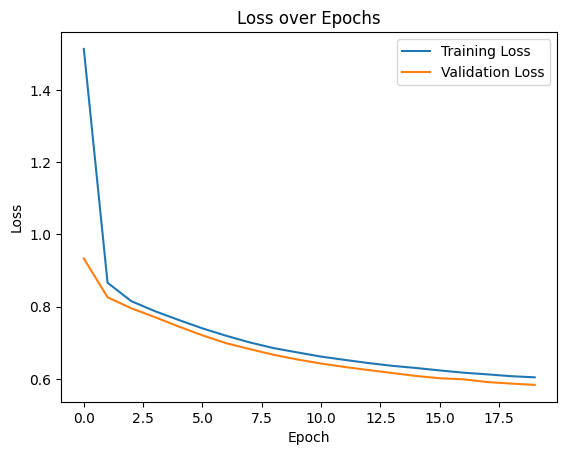

In [47]:
import matplotlib.pyplot as plt

# Á≤æÂ∫¶„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ÊêçÂ§±„ÅÆ„Éó„É≠„ÉÉ„Éà
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [63]:
import numpy as np

# „É©„É≥„ÉÄ„É†„Å´„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí5„Å§ÈÅ∏„Å∂ÔºàÈáçË§á„Å™„ÅóÔºâ
random_indices = np.random.choice(len(df), size=5, replace=False)

# ÁâπÂæ¥Èáè„ÇíÂèñÂæó„ÅóÊ®ôÊ∫ñÂåñ
sample_rows = df.drop("ModelCode", axis=1).iloc[random_indices]
sample_scaled = scaler.transform(sample_rows)

# ‰∫àÊ∏¨
pred_probs = model.predict(sample_scaled)
predicted_modelcodes = np.argmax(pred_probs, axis=1) + 1  # 1„Äú9„Å´Êàª„Åô
true_modelcodes = df["ModelCode"].iloc[random_indices].values

# Ë°®Á§∫
for i, idx in enumerate(random_indices):
    confidence = np.max(pred_probs[i])
    print(f"\nüìå ÈÅ∏Êäû: {idx+1} Ë°åÁõÆ")
    print(f"‚ñ∂Ô∏è Êé®ÂÆöModelCode: {predicted_modelcodes[i]}")
    print(f"‚úÖ ÂÆüÈöõ„ÅÆModelCode: {true_modelcodes[i]}")
    print(f"üìä Á¢∫ÁéáÂàÜÂ∏É: {pred_probs[i]}")
    print(f"üîí Ëá™‰ø°„Çπ„Ç≥„Ç¢ÔºàÊúÄÂ§ßÁ¢∫ÁéáÔºâ: {confidence:.4f}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step

üìå ÈÅ∏Êäû: 25457 Ë°åÁõÆ
‚ñ∂Ô∏è Êé®ÂÆöModelCode: 7
‚úÖ ÂÆüÈöõ„ÅÆModelCode: 7
üìä Á¢∫ÁéáÂàÜÂ∏É: [4.0812516e-05 9.4588177e-05 1.3141055e-05 1.6209152e-17 1.9468250e-03
 5.0109735e-17 9.9566615e-01 1.2362173e-05 2.2260626e-03]
üîí Ëá™‰ø°„Çπ„Ç≥„Ç¢ÔºàÊúÄÂ§ßÁ¢∫ÁéáÔºâ: 0.9957

üìå ÈÅ∏Êäû: 4435 Ë°åÁõÆ
‚ñ∂Ô∏è Êé®ÂÆöModelCode: 5
‚úÖ ÂÆüÈöõ„ÅÆModelCode: 5
üìä Á¢∫ÁéáÂàÜÂ∏É: [1.20242212e-05 3.34902039e-09 1.10485225e-07 2.19971066e-33
 9.99695778e-01 8.72277789e-20 1.78609102e-04 1.61243395e-06
 1.11828071e-04]
üîí Ëá™‰ø°„Çπ„Ç≥„Ç¢ÔºàÊúÄÂ§ßÁ¢∫ÁéáÔºâ: 0.9997

üìå ÈÅ∏Êäû: 20321 Ë°åÁõÆ
‚ñ∂Ô∏è Êé®ÂÆöModelCode: 7
‚úÖ ÂÆüÈöõ„ÅÆModelCode: 3
üìä Á¢∫ÁéáÂàÜÂ∏É: [3.2586552e-04 1.3256443e-03 8.7637417e-02 7.0122960e-06 2.6378799e-02
 6.5910777e-11 8.8361287e-01 9.3403487e-06 7.0300873e-04]
üîí Ëá™‰ø°„Çπ„Ç≥„Ç¢ÔºàÊúÄÂ§ßÁ¢∫ÁéáÔºâ: 0.8836

üìå ÈÅ∏Êäû: 22692 Ë°åÁõÆ
‚ñ∂Ô∏è Êé®ÂÆöModelCode: 7
‚úÖ ÂÆüÈöõ„ÅÆModelCode: 7
üìä Á¢∫ÁéáÂ

169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 947us/step


c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\H6445\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20803 (\N{CJK UNIFIE

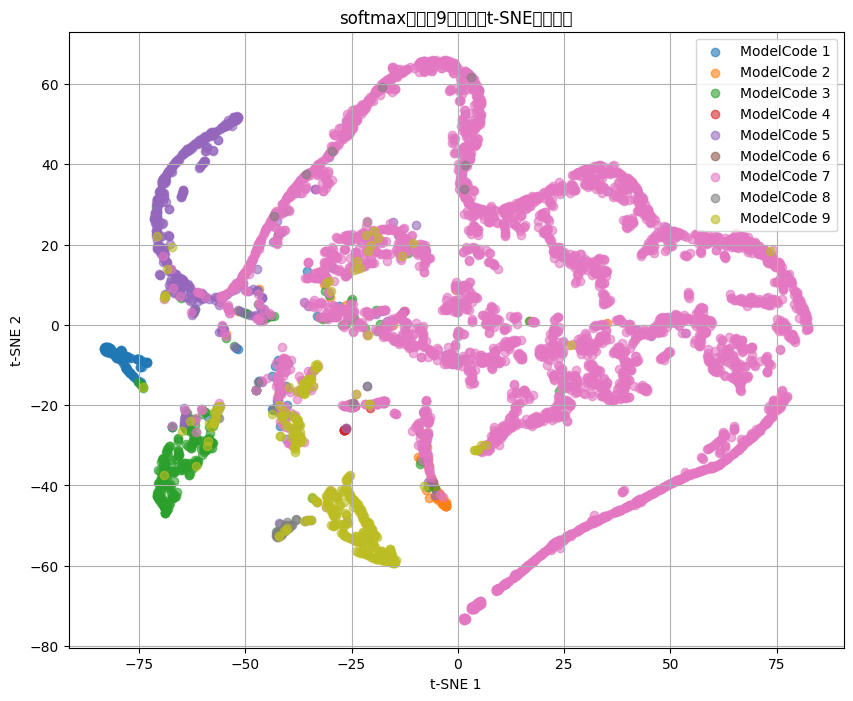

In [60]:
# ÊúÄÁµÇÂá∫ÂäõÔºàsoftmaxÁ¢∫ÁéáÔºâ„ÇíÂèñÂæó
softmax_output = model.predict(X_val)  # shape: (N, 9)

# t-SNE„Åß2Ê¨°ÂÖÉ„Å∏Â§âÊèõ
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(softmax_output)

# „É©„Éô„É´„ÅØÂÖÉ„ÅÆModelCodeÔºà1„Äú9Ôºâ„Å´Êàª„Åô
y_val_labels = y_val + 1

# ÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(1, 10):
    idx = (y_val_labels == i)
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=f'ModelCode {i}', alpha=0.6)

plt.title("softmaxÂá∫ÂäõÔºà9Ê¨°ÂÖÉÔºâ„Çít-SNE„ÅßÂèØË¶ñÂåñ")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.show()


169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 690us/step


C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\H6445\AppData\Local\Temp\ipykernel_18320\1614469258.py:27: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.9

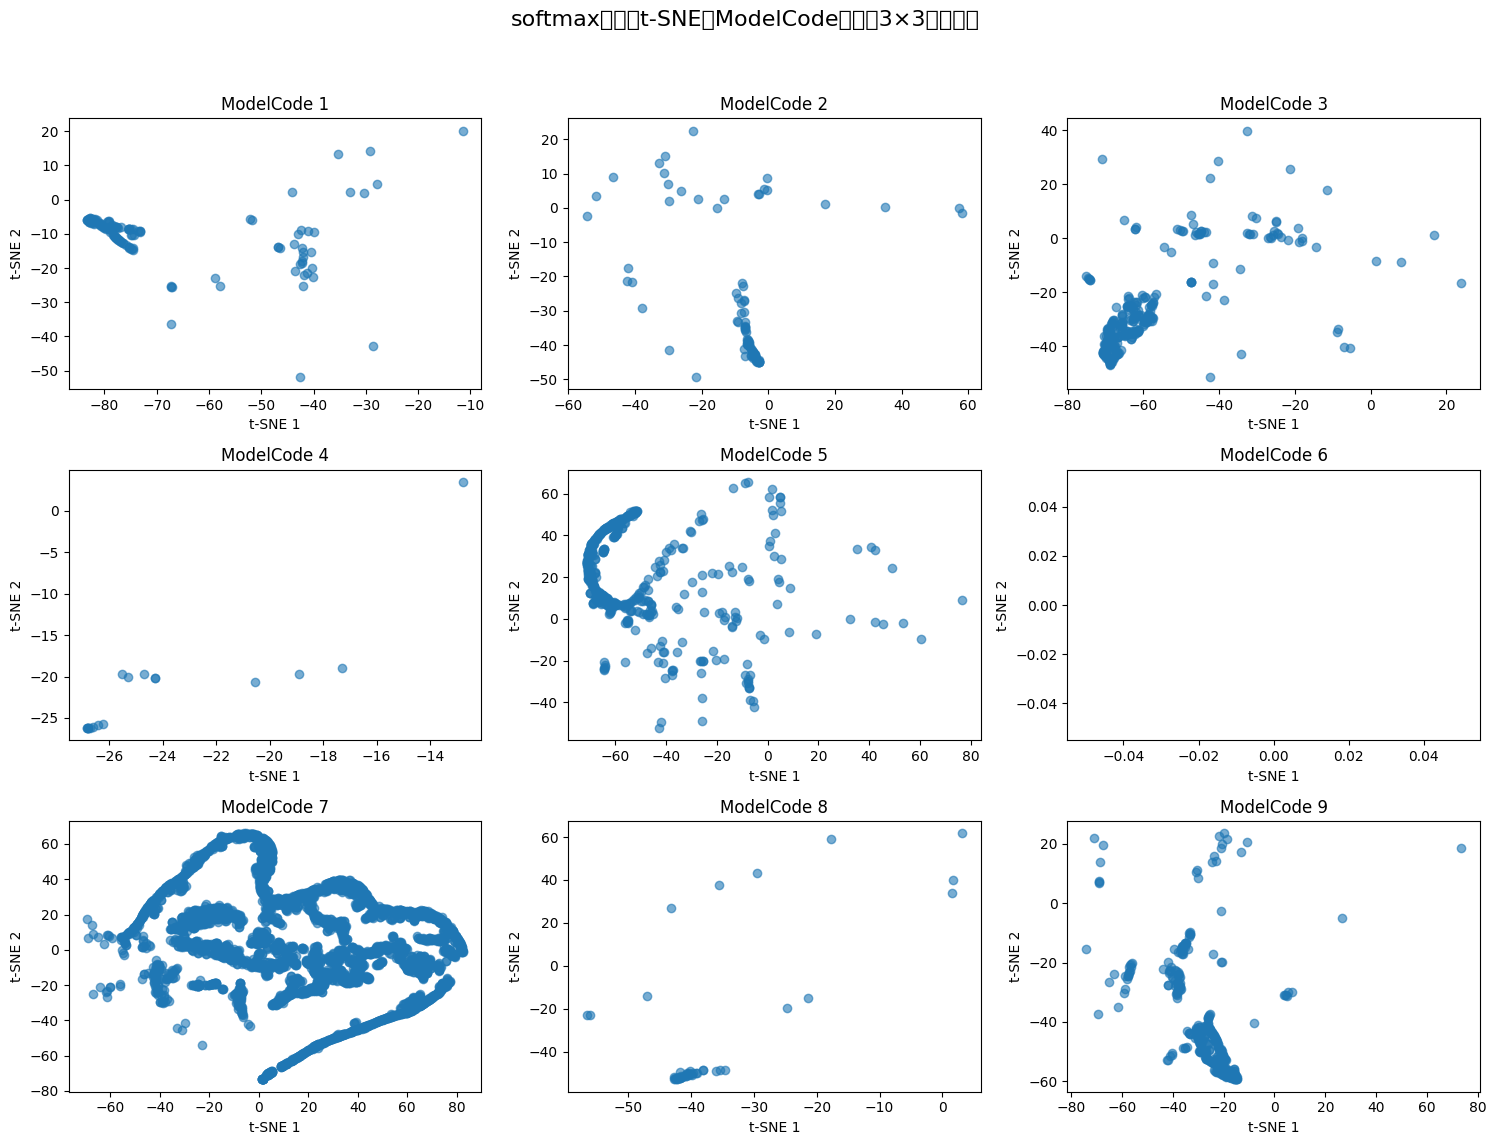

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# softmaxÂá∫Âäõ„ÇíÂèñÂæó
softmax_output = model.predict(X_val)

# t-SNE„Åß2Ê¨°ÂÖÉ„Å´ÂúßÁ∏Æ
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(softmax_output)

# „É©„Éô„É´„ÇíÂÖÉ„ÅÆ1„Äú9„Å´Êàª„Åô
y_val_labels = y_val + 1

# 3√ó3 „ÅÆ„Çµ„Éñ„Éó„É≠„ÉÉ„Éà„Çí‰ΩúÊàê
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("softmaxÂá∫Âäõ„ÅÆt-SNEÔºàModelCode„Åî„Å®„Å´3√ó3„ÅßË°®Á§∫Ôºâ", fontsize=16)

# ÂêÑ ModelCode „Å´ÂØæ„Åó„Å¶„Éó„É≠„ÉÉ„Éà
for i in range(1, 10):
    ax = axes[(i-1)//3, (i-1)%3]
    idx = (y_val_labels == i)
    ax.scatter(X_tsne[idx, 0], X_tsne[idx, 1], alpha=0.6, color='tab:blue')
    ax.set_title(f'ModelCode {i}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
